
# **Assignment 1: Default Payment Predictions - October 2024**



> - **Author:** Elio Gargiulo
- **ID:** 869184
- **Course:** Advanced Machine Learning
- **A.Y:** 2024/25
- **University:** Milano Bicocca - Master Degree in Computer Science


# **Predicting Default Payments with Fully-Connected NNs**

> The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.




## **Description of the Dataset**



> This dataset employs a binary variable to indicate whether a credit card payment occurred (1 = Yes, 0 = No). The study selected the following 23 (25 including the ID and target) factors as explanatory variables:

- **Variable 1**: Amount of credit granted (in local currency), which includes both individual credit and family (supplementary) credit.

- **Variable 2**: Gender (1 = male; 2 = female).

- **Variable 3**: Education level (1 = graduate school; 2 = university; 3 = high school; 4 = others; 5 and 6 = unknown).

- **Variable 4**: Marital status (1 = married, 2 = single, 3 = others).

- **Variable 5**: Age (years).

- **Variables 6-11**: Payment history over several months. The scale for payment status ranges from -2, -1 (paid on time) to 9 (delayed by nine months or more). It tracks payments from April to September:
  - **Variable 6**: Payment status in September;
  - **Variable 7**: Payment status in August;
  - **Variable 8**: Payment status in July;
  - **Variable 9**: Payment status in June;
  - **Variable 10**: Payment status in May;
  - **Variable 11**: Payment status in April.
- **Variables 12-17**: Amount of monthly billing (in local currency), tracking statements from September to April.

- **Variables 18-23**: Amount of previous payments (in local currency), corresponding to monthly payments made from September to April.


## **Initialization**

> Before starting with the project itself, let's import the libraries and the data that will be used to achive our goals

### **Initialization: Libraries**

> Importing the necessary libraries.

In [ ]:
from keras.models import Sequential               # For NNs
from keras.layers import Dense, Activation, Input # For NNs
from keras.optimizers import Adam                 # For NNs
import numpy as np                                # For Numerical Computing
import pandas as pd                               # For Dataset Analysis
import matplotlib.pyplot as plt                   # For Plots
import seaborn as sns                             # For Plots
from sklearn.preprocessing import StandardScaler  # For Standard Scaling
from sklearn.metrics import classification_report # For Metrics
from google.colab import drive                    # For Dataset Importing
from google.colab import files                    # For Predictions


### **Initialization: Importing the Data**

> In this case the dataset is uploaded on Google Drive, so we need to import it using Google Colab.

In [ ]:
# Mouting the drive
drive.mount('/content/drive')

# Defining the paths to each csv file, in this case one for train and one for test
train_path = '/content/drive/MyDrive/Colab Notebooks/Assignment 1/train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/Assignment 1/test.csv'

# Load the train and test datasets into the project
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Checking that the train dataset has been correctly imported
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,19193,200000,2,1,1,38,-2,-2,-2,-2,...,2571,2571,2571,2772,2571,2571,2571,2571,2571,0
1,1131,230000,2,2,1,34,0,0,0,0,...,155335,153427,150514,8913,5449,5339,5370,4435,4432,1
2,17557,50000,2,2,2,42,0,0,0,0,...,49311,24663,24854,1763,2112,1756,324,336,351,0
3,29901,20000,1,2,2,29,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,14696,30000,2,3,1,59,1,2,2,2,...,30467,29858,28898,1950,200,2492,0,580,0,1


In [ ]:
# Checking that the test dataset has been correctly imported
df_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,9956,180000,2,2,1,32,-1,2,-1,0,...,7658,1000,1650,1000,0,7667,0,1650,1000,2000
1,879,50000,2,2,1,43,0,0,0,-1,...,20165,10732,10566,10757,1800,1775,10732,384,757,501
2,554,240000,2,1,1,42,1,-1,-1,-2,...,0,0,0,0,6370,0,0,0,0,0
3,142,180000,1,2,2,28,-1,-1,-1,-1,...,832,332,416,416,0,416,332,500,3500,832
4,14630,320000,2,1,1,39,0,0,0,0,...,128832,133329,53870,13185,5000,15000,5000,5000,3000,5000


## **Inspecting the Data**

> Let's quickly study the dataset (in this case the focus will mostly be on the train split) before implementing the Neural Network. This way we can first confirm that the data is correct and consistent compared to its provided description. Then we can analize the type of data and distribution of each feature to understand better the whole dataset.

### **Inspecting the Data: Number of Records and Features**

> *shape* returns a tuple which contains in order:
  - Number of rows, so the number of record in the dataset.
  - Number of column, so the number of features in the dataset.

> We have 25500 records and 25 features.

In [ ]:
# Shape of the dataset (train)
df_train.shape

(25500, 25)

> It could be useful to verify how many records we have for testing.

> We have 4500 records and 24 features, 1 less than training because the target is not included.

In [ ]:
# Shape of the dataset (test)
df_test.shape

(4500, 24)

### **Inspecting the Data: Types**

> *dtypes* shows how each feature is considered in the environment (their type).

> For now we have int64 for every feature.

In [ ]:
# Data types
df_train.dtypes

,0
ID,int64
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


### **Inspecting the Data: Summaries**

> *info()* returns the overall summary of our dataset. In particular:
- The number of non-null values in each column.
- The type of data of each column.
- The records (rows) in the dataset.
- Memory usage of the dataset.

> There are 25 features with no missing values and 25500 records, which confirms the previous steps.

In [ ]:
# Summary of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          25500 non-null  int64
 1   LIMIT_BAL                   25500 non-null  int64
 2   SEX                         25500 non-null  int64
 3   EDUCATION                   25500 non-null  int64
 4   MARRIAGE                    25500 non-null  int64
 5   AGE                         25500 non-null  int64
 6   PAY_0                       25500 non-null  int64
 7   PAY_2                       25500 non-null  int64
 8   PAY_3                       25500 non-null  int64
 9   PAY_4                       25500 non-null  int64
 10  PAY_5                       25500 non-null  int64
 11  PAY_6                       25500 non-null  int64
 12  BILL_AMT1                   25500 non-null  int64
 13  BILL_AMT2                   25500 non-null  int64
 14  BILL_A

> *describe()* provides summary statistics of our Dataset, in particular:
  - Count: Number of non-null entries.
  - Mean: Average value.
  - Std: Standard deviation, which measures how spread out the values are.
  - Min: Minimum value.
  - 25%: The 25th percentile (first quartile), which is the value below which 25% of the data falls.
  - 50% (Median): The 50th percentile, also known as the median.
  - 75%: The 75th percentile (third quartile), which is the value below which 75% of the data falls.
  - Max: Maximum value.

> With *describe()*  we can verify and check the min and max value of every feature as well as having more useful statistics like count (for missing values), mean, etc.

In [ ]:
# Summary statistics
df_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,25500.00000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,...,25500.000000,25500.000000,25500.000000,25500.000000,2.550000e+04,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,14956.95702,167569.007059,1.604118,1.852353,1.550392,35.509294,-0.013098,-0.130784,-0.163294,-0.218235,...,43336.952196,40307.121059,38924.328157,5594.010863,5.934389e+03,5319.529647,4812.161373,4812.480431,5236.509176,0.222941
std,8667.36982,130002.156470,0.489049,0.787991,0.522757,9.200408,1.126314,1.199481,1.199697,1.169681,...,64433.082446,60870.691089,59659.509920,16235.253410,2.381277e+04,18157.653215,15560.524538,15206.108094,17958.888070,0.416227
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7432.75000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2338.750000,1767.250000,1266.750000,1000.000000,8.270000e+02,396.000000,291.000000,251.000000,125.750000,0.000000
50%,14942.50000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19111.000000,18112.500000,17150.000000,2100.000000,2.002000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22431.25000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54475.000000,50178.250000,49132.500000,5006.000000,5.000000e+03,4560.500000,4000.000000,4071.500000,4000.000000,0.000000
max,30000.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


> There are some inconsistencies with the original description of the dataset given in the assignment page on elearning, for example *PAY_X* has a minimum of 2 while the description states that the values are between -1 and 9.

### **Inspecting the Data: Plots**

> Since using only *describe()* to have an idea of the distribution could be tedious, it's better to use also a plot.

> The following plots will provide the general distribution of the features and the target. The ID will be ignored since it's not necessary for training.

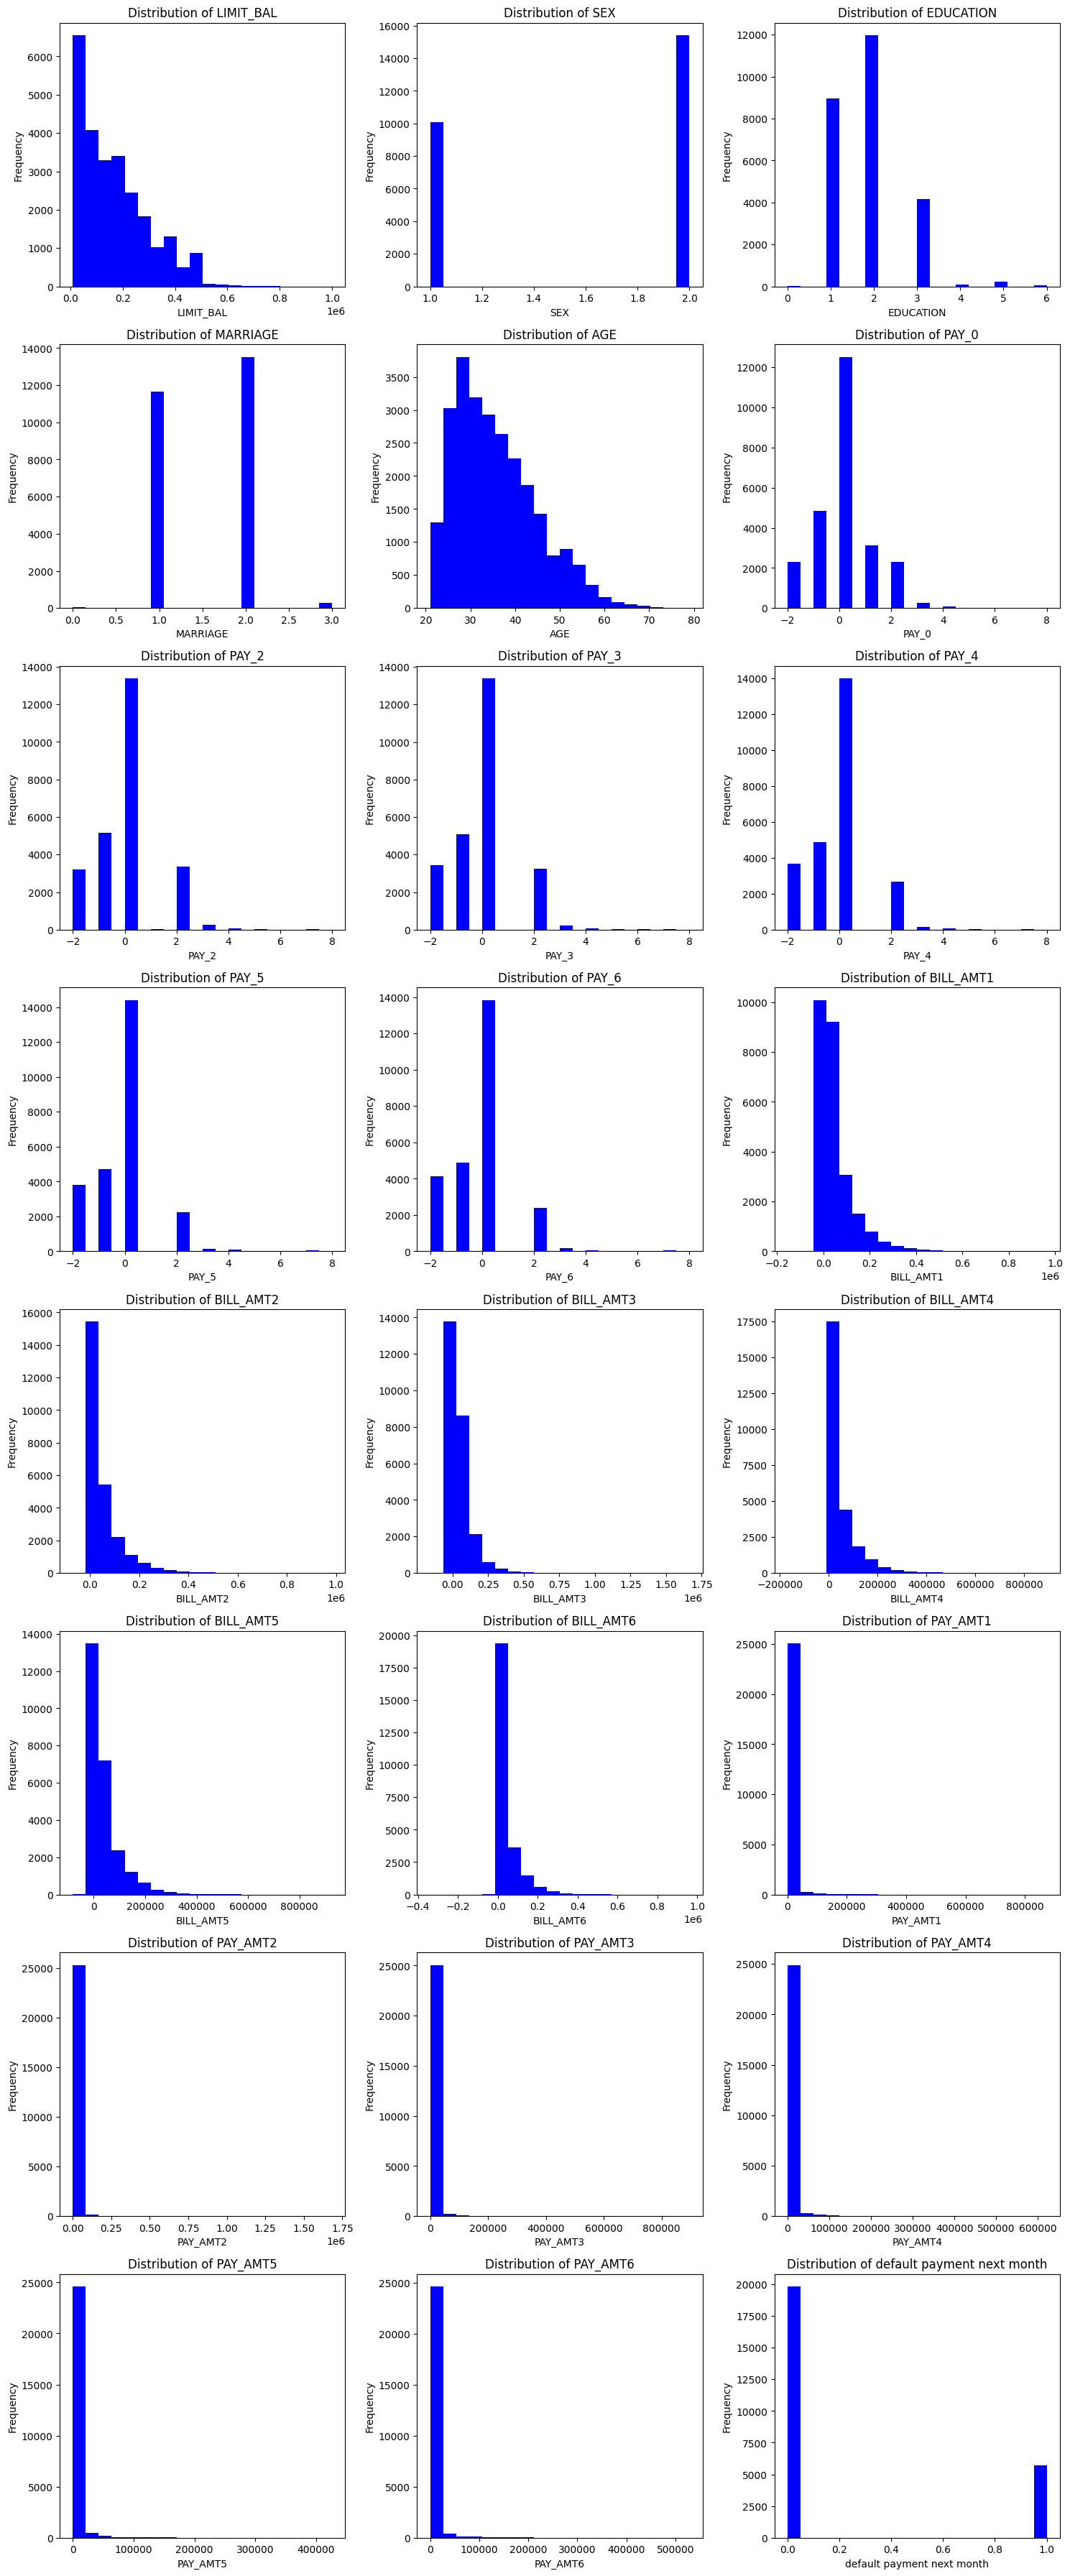

In [ ]:
# Distribution of the features, minus "ID"

# Setting up the plot
num_columns = 3
num_rows = (len(df_train.columns) - 1) // num_columns  # Subtract 1 for the ID column
plt.figure(figsize=(15, 5 * num_rows))

# Create an Histogram for each numerical feature in the dataset, excluding the ID column
for i, column in enumerate(df_train.columns):
    if column != 'ID': # Different from ID
        plt.subplot(num_rows + 1, num_columns, i)
        plt.hist(df_train[column], color='blue', bins=20)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')

# Adjust and display of the plot
plt.tight_layout()
plt.show()


> The histograms show the distribution of each feature, where we can deduce that:
  - **LIMIT_BAL, PAY_AMTX, BILL_ATMX** have really big numbers, as seen by *1e6* notation and also some negative numbers in **BILL_ATMX**.
  - **PAY_X** shows that most of the time the value is close to 0.
  - **EDUCATION** shows that most of people went to university.
  - **SEX** contains more Female than Males.
  - **AGE** contains a large amount of different values, from ~20 years old to ~75 years old.
  - The **target** seems unbalanced, with more 0 than 1.



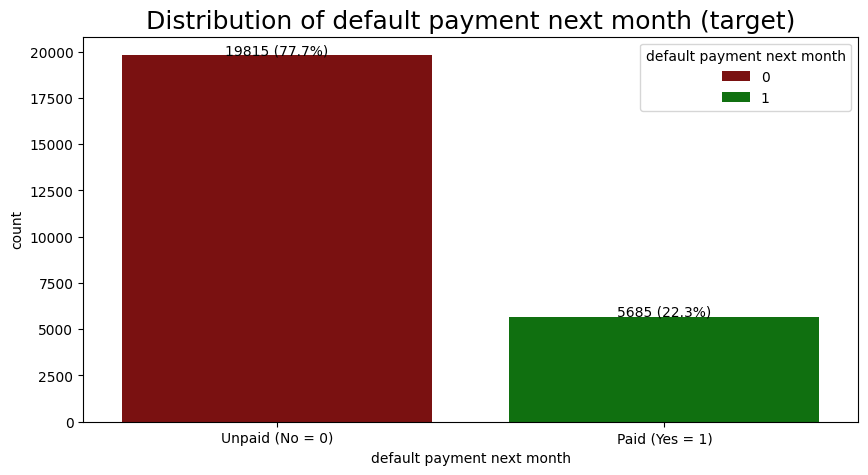

In [ ]:
# Distribution of the target "default payment next month"

# Setting up the plot
plt.figure(figsize=(10, 5))
plt.title("Distribution of default payment next month (target)", size=18)
ax = sns.countplot(x=df_train['default payment next month'], hue=df_train['default payment next month'], palette=['darkred', 'green'])

# Setting up the labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Unpaid (No = 0)', 'Paid (Yes = 1)'])

# Creating the Box Plot
total = len(df_train["default payment next month"])
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.text(p.get_x() + p.get_width()/2., height + 30, str(height) + ' (' + str(percentage) + ')', ha="center")

# Display the plot
plt.show()

> Focusing only on the **target**, in the following plot it's noticeable how the target is unbalanced:
- **77.7% of "No"**
- **22.3% of "Yes"**

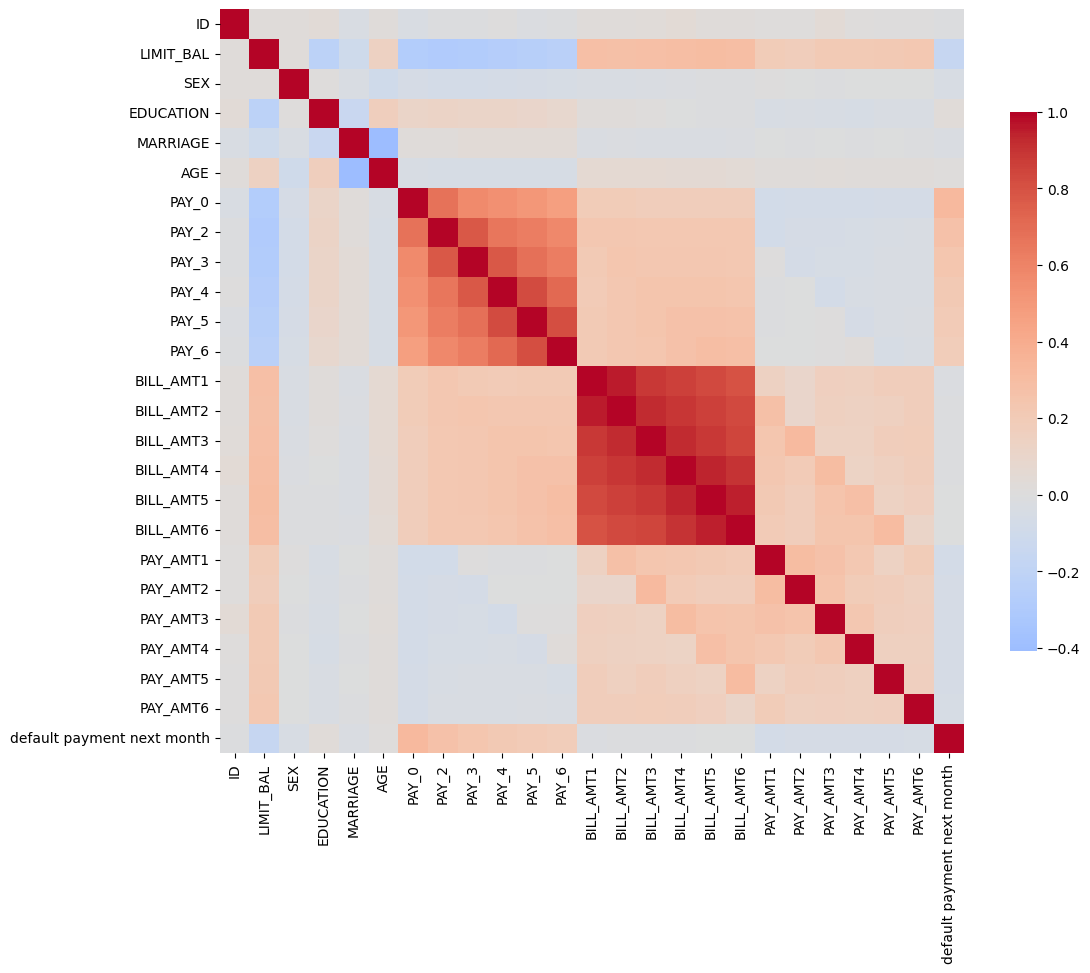

In [ ]:
# Correlation matrix
corr = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.7})
plt.show()


> **BILL_AMTX** all have a very strong correlation between each other, as seen in the hystograms, their distribution is very similar.

> This means that to simplify the training performance we could drop or aggregate those features since they are redundant.

## **Preparing the data**

> The last step before implementing the actual model is to check and prepare the data. We will remove useless (noisy) data like missing values, duplicated rows and columns that do not add any valuable information. Finally we prepare the data for the Neural Network.


### **Preparing the data: ID Drop**


> Dropping the *ID* column because it does not add any valuable information to the set, since it is just an identifier.

In [ ]:
# Dropping the ID column from train df
df_train.drop(columns='ID', inplace=True)
# Check if it did drop the ID
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,200000,2,1,1,38,-2,-2,-2,-2,-2,...,2571,2571,2571,2772,2571,2571,2571,2571,2571,0
1,230000,2,2,1,34,0,0,0,0,0,...,155335,153427,150514,8913,5449,5339,5370,4435,4432,1
2,50000,2,2,2,42,0,0,0,0,0,...,49311,24663,24854,1763,2112,1756,324,336,351,0
3,20000,1,2,2,29,0,0,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,30000,2,3,1,59,1,2,2,2,2,...,30467,29858,28898,1950,200,2492,0,580,0,1


> We drop the *ID* also in the test set.

In [ ]:
# Dropping the ID column from test df
df_test.drop(columns='ID', inplace=True)
# Check if it did drop the ID
df_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,180000,2,2,1,32,-1,2,-1,0,-1,...,7658,1000,1650,1000,0,7667,0,1650,1000,2000
1,50000,2,2,1,43,0,0,0,-1,0,...,20165,10732,10566,10757,1800,1775,10732,384,757,501
2,240000,2,1,1,42,1,-1,-1,-2,-2,...,0,0,0,0,6370,0,0,0,0,0
3,180000,1,2,2,28,-1,-1,-1,-1,-1,...,832,332,416,416,0,416,332,500,3500,832
4,320000,2,1,1,39,0,0,0,0,0,...,128832,133329,53870,13185,5000,15000,5000,5000,3000,5000


### **Preparing the data: Merging Reduntant Data and Drop**

> As seen in the correlation matrix, it's possible to remove redundant data and leaving just one feature, or we can aggregate them. In this case the features will be aggregated using the mean. The model performance should remain very similar, even if we technically have a loss of information.

In [ ]:
# We will merge the data with the mean values
df_train['mean_bill_amt'] = df_train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Removing the redundant data
df_train.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1, inplace=True)

> Checking the new features in the train

In [ ]:
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,mean_bill_amt
0,200000,2,1,1,38,-2,-2,-2,-2,-2,-2,2772,2571,2571,2571,2571,2571,0,2604.500000
1,230000,2,2,1,34,0,0,0,0,0,0,8913,5449,5339,5370,4435,4432,1,180860.000000
2,50000,2,2,2,42,0,0,0,0,0,0,1763,2112,1756,324,336,351,0,40606.166667
3,20000,1,2,2,29,0,0,-2,-2,-2,-2,0,0,0,0,0,0,1,2801.500000
4,30000,2,3,1,59,1,2,2,2,2,0,1950,200,2492,0,580,0,1,29224.500000


In [ ]:
# Reorder columns to move mean_bill_amt right before the target column
columns_order = list(df_train.columns[:-2]) + ['mean_bill_amt','default payment next month']
df_train = df_train[columns_order]

In [ ]:
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,mean_bill_amt,default payment next month
0,200000,2,1,1,38,-2,-2,-2,-2,-2,-2,2772,2571,2571,2571,2571,2571,2604.500000,0
1,230000,2,2,1,34,0,0,0,0,0,0,8913,5449,5339,5370,4435,4432,180860.000000,1
2,50000,2,2,2,42,0,0,0,0,0,0,1763,2112,1756,324,336,351,40606.166667,0
3,20000,1,2,2,29,0,0,-2,-2,-2,-2,0,0,0,0,0,0,2801.500000,1
4,30000,2,3,1,59,1,2,2,2,2,0,1950,200,2492,0,580,0,29224.500000,1


> Same operation for the test set.

In [ ]:
# We will merge the data with the mean values
df_test['mean_bill_amt'] = df_test[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Removing the redundant data
df_test.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1, inplace=True)

> Checking the new features in the test

In [ ]:
df_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,mean_bill_amt
0,180000,2,2,1,32,-1,2,-1,0,-1,-1,0,7667,0,1650,1000,2000,2381.666667
1,50000,2,2,1,43,0,0,0,-1,0,0,1800,1775,10732,384,757,501,16731.166667
2,240000,2,1,1,42,1,-1,-1,-2,-2,-2,6370,0,0,0,0,0,1061.666667
3,180000,1,2,2,28,-1,-1,-1,-1,-1,-1,0,416,332,500,3500,832,638.000000
4,320000,2,1,1,39,0,0,0,0,0,0,5000,15000,5000,5000,3000,5000,108807.500000


### **Preparing the data: Duplicated Rows**


> Since we have no missing values (verified in steps above), we can check if there is any redundant information, which means checking if there are duplicated rows.

> 25 duplicated data in train dataset.

In [ ]:
# Check for duplicated rows in train df
df_train.duplicated().sum()

25

> It's better to remove the duplicates

In [ ]:
# Removing the duplicates from df_train
df_train.drop_duplicates(inplace=True)

# Check if there are any duplicates left
print(f"Train duplicates: {df_train.duplicated().sum()}")

Train duplicates: 0


### **Preparing the data: Neural Network**

 > The next step will be to split the features that the model will use to "learn" from the target/label, in this case *default payment next month*.

In [ ]:
# Dataset preprocessing for NN

# Train: Splitting the features (X_train) from the target (y_train)
X_train = df_train.iloc[:, :-1]  # All columns except the target
y_train = df_train['default payment next month']   # Our target

# Test: No target in this dataset so we can just copy it
X_test = df_test


 > Finally, the data will be standardized to improve a lot the performance of the NN by ensuring that the input features are on a similar scale. This is necessary for stabilizing the optimization process for the weights.

In [ ]:
# Standad Scaling for improving the performance
scaler = StandardScaler()

# Fit the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> Checking if the *shape* of the split is indeed correct.

In [ ]:
# Check if there are 18 features (no target)
X_train.shape

(25475, 18)

In [ ]:
# Check if there are 18 features (no target)
X_test.shape

(4500, 18)

## **Building the network**



### **Building the network: Preliminaries**

> Confirming the input and output shape and also that we got a binary classification problem.

In [ ]:
# Getting the input shape
dims = X_train.shape[1]
print('Input Shape =', dims)

# Getting the output shape
nb_classes = len(np.unique(y_train))
print('Number classes = Output Shape =', nb_classes)

# Getting the output values (classes)
classes = np.unique(y_train)
print('Classes =', classes)

Input Shape = 18
Number classes = Output Shape = 2
Classes = [0 1]


### **Building the network: Model Base Creation**

> For the model creation we can edit some important parameters like:
  - The Activation Function
  - The Number of Neurons
  - The Number of Hidden Layers

> The input layer will have the number of features remained in our dataset, so 18.

> For the hidden layers, we have a "small" dataset, so usually one hidden layer should give good results. There will also be an attempt with two layers. The number of neurons chosen are close to the number of features (in this case a bit lower) and a power of two (thumb rule).

> The activation function for the hidden layers is **ReLU**.

> Since we have a binary classification problem, the best output function (activation on the last layer) will be the **Sigmoid**, while the number of neurons will be 1. It's also possible to use the **Softmax** function with 2 neurons.




In [ ]:
# Sequential layers
model_base = Sequential()
# Input layer
model_base.add(Input((dims,))) # dims = 18
# Hidden layer
model_base.add(Dense(16, activation='relu')) # For the hidden layers
# Output layer
model_base.add(Dense(1, activation='sigmoid')) # Better for binary classification

> Printing the summary of the created model.

In [ ]:
model_base.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)                    │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

### **Building the network: Model Base Compile**

> When compiling the model the most common choices are:
  - The Optimizer (and learning rate)
  - The Loss function
  - The metrics

> For the optimizer, *Adam* is generally the best choice, while for the learning rate you need to find the best tradeoff between overfitting, epochs and such.

> For the loss function, we have a binary classification problem, so the choice is *binary_crossentropy*

> Finally for the metrics the focus is on *accuracy* but also most importantly on *recall* and *f1-score* since the target is unbalanced.

In [ ]:
opt_base = Adam(learning_rate=0.001) # Adam default Learning rate is 0.001, let's try it
# Compiling the model
model_base.compile(optimizer=opt_base, loss='binary_crossentropy', metrics=['accuracy', 'recall'])

### **Building the network: Model Base Variant**

> Let's also use a smaller learning rate

In [ ]:
# Sequential layers
model_base_var = Sequential()
# Input layer
model_base_var.add(Input((dims,)))
# Hidden layer
model_base_var.add(Dense(16, activation='relu'))
# Output layer
model_base_var.add(Dense(1, activation='sigmoid')) # Better for binary classification

In [ ]:
model_base_var.summary()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_142 (Dense)                    │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
opt_base_var = Adam(learning_rate=0.0001) # Smaller LR
# Compiling the model
model_base_var.compile(optimizer=opt_base_var, loss='binary_crossentropy', metrics=['accuracy', 'recall'])

### **Building the network: Model Alternative Creation**



> This time there will be a second hidden layer. This could help capture more information but could increase overfitting.

In [ ]:
# Sequential layers
model_alt = Sequential()
# Input layer
model_alt.add(Input((dims,)))
# Hidden layer
model_alt.add(Dense(16, activation='relu')) # For the hidden layers
model_alt.add(Dense(8, activation='relu')) # For the hidden layers (decreasing with a power of 2)
# Output layer
model_alt.add(Dense(1, activation='sigmoid')) # Better for binary classification

> Printing the summary of the created model.

In [ ]:
model_alt.summary()

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)                    │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

### **Building the network: Model Alternative Compile**

> Same parameters as the model base

In [ ]:
opt_alt = Adam(learning_rate=0.001) # Default learning rate
# Compiling the model
model_alt.compile(optimizer=opt_alt, loss='binary_crossentropy', metrics=['accuracy', 'recall'])

### **Building the network: Model Alternative Variant**

> Changing the value of the learning rate to a lower one

In [ ]:
# Sequential layers
model_alt_var = Sequential()
# Input layer
model_alt_var.add(Input((dims,)))
# Hidden layer
model_alt_var.add(Dense(16, activation='relu')) # For the hidden layers
model_alt_var.add(Dense(8, activation='relu')) # For the hidden layers (decreasing with a power of 2)
# Output layer
model_alt_var.add(Dense(1, activation='sigmoid')) # Better for binary classification

In [ ]:
model_alt_var.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_147 (Dense)                    │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
opt_alt_var = Adam(learning_rate=0.0001) # Smaller learning rate
# Compiling the model
model_alt_var.compile(optimizer=opt_alt_var, loss='binary_crossentropy', metrics=['accuracy', 'recall'])

## **Analyze and comment the training results**

> For every model it's also possible to choose:
  - *batch_size*: 64 for speeding up a bit the training.
  - *epochs*: 20 for the default learning rate and 40 (double) for the smaller one as a start. The default learning rate should converge earlier, so to avoid too much overfitting we try stopping the training a bit earlier.
  - *validation_split*: 0.2. The value is chosen based on how the models behave, but generally not too high.

### **Analyze and comment the training results: Model Base**

In [ ]:
history_base = model_base.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6250 - loss: 0.6481 - recall: 0.4921 - val_accuracy: 0.7994 - val_loss: 0.4872 - val_recall: 0.1855
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8073 - loss: 0.4704 - recall: 0.2139 - val_accuracy: 0.8102 - val_loss: 0.4635 - val_recall: 0.2866
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8088 - loss: 0.4605 - recall: 0.2717 - val_accuracy: 0.8112 - val_loss: 0.4571 - val_recall: 0.2970
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - loss: 0.4512 - recall: 0.2781 - val_accuracy: 0.8147 - val_loss: 0.4540 - val_recall: 0.3223
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.4541 - recall: 0.3204 - val_accuracy: 0.8151 - val_loss: 0.4500 - val_recall: 0.3240
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8119 - loss: 0.4514 - recall: 0.2977 - val_accuracy: 0.8175 - val_loss: 0.4488 - val_recall: 0.3240
Epoc

### **Analyze and comment the training results: Model Base Variant**

In [ ]:
history_base_var = model_base_var.fit(X_train, y_train, batch_size=64, epochs=40, validation_split=0.2)

Epoch 1/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4040 - loss: 0.7578 - recall: 0.6563 - val_accuracy: 0.5861 - val_loss: 0.6747 - val_recall: 0.4948
Epoch 2/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6284 - loss: 0.6543 - recall: 0.4429 - val_accuracy: 0.7048 - val_loss: 0.6081 - val_recall: 0.3284
Epoch 3/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7309 - loss: 0.5978 - recall: 0.3316 - val_accuracy: 0.7605 - val_loss: 0.5699 - val_recall: 0.2657
Epoch 4/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7795 - loss: 0.5592 - recall: 0.2502 - val_accuracy: 0.7825 - val_loss: 0.5471 - val_recall: 0.2247
Epoch 5/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7896 - loss: 0.5398 - recall: 0.2093 - val_accuracy: 0.7916 - val_loss: 0.5319 - val_recall: 0.2038
Epoch 6/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7936 - loss: 0.5305 - recall: 0.1984 - val_accuracy: 0.7978 - val_loss: 0.5206 - val_recall: 0.1969
Epoc

### **Analyze and comment the training results: Model Alternative**

In [ ]:
history_alt = model_alt.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7512 - loss: 0.5801 - recall: 0.1064 - val_accuracy: 0.8079 - val_loss: 0.4677 - val_recall: 0.3284
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8096 - loss: 0.4621 - recall: 0.3000 - val_accuracy: 0.8126 - val_loss: 0.4520 - val_recall: 0.3746
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8160 - loss: 0.4465 - recall: 0.3540 - val_accuracy: 0.8177 - val_loss: 0.4467 - val_recall: 0.3772
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8142 - loss: 0.4460 - recall: 0.3359 - val_accuracy: 0.8173 - val_loss: 0.4438 - val_recall: 0.3824
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8192 - loss: 0.4392 - recall: 0.3618 - val_accuracy: 0.8163 - val_loss: 0.4429 - val_recall: 0.3789
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8126 - loss: 0.4466 - recall: 0.3344 - val_accuracy: 0.8161 - val_loss: 0.4422 - val_recall: 0.3998
Epoc

### **Analyze and comment the training results: Model Alternative Variant**

In [ ]:
history_alt_var = model_alt_var.fit(X_train, y_train, batch_size=64, epochs=40, validation_split=0.2)

Epoch 1/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2441 - loss: 0.7938 - recall: 0.9658 - val_accuracy: 0.3537 - val_loss: 0.7284 - val_recall: 0.8206
Epoch 2/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4155 - loss: 0.7159 - recall: 0.7277 - val_accuracy: 0.6245 - val_loss: 0.6745 - val_recall: 0.4869
Epoch 3/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6655 - loss: 0.6647 - recall: 0.4226 - val_accuracy: 0.7572 - val_loss: 0.6200 - val_recall: 0.3223
Epoch 4/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7658 - loss: 0.6110 - recall: 0.2951 - val_accuracy: 0.7953 - val_loss: 0.5708 - val_recall: 0.2840
Epoch 5/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7975 - loss: 0.5641 - recall: 0.2646 - val_accuracy: 0.8022 - val_loss: 0.5366 - val_recall: 0.2718
Epoch 6/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8042 - loss: 0.5319 - recall: 0.2370 - val_accuracy: 0.8043 - val_loss: 0.5143 - val_recall: 0.2709
Epoc

## **Validate the model and comment the results**

> To analyze the validation performance it's possible to use a plot that shows the loss in training/validation and the accuracy. On the Y-axis there is the actual value of loss/accuracy and on the X-axis the epochs. We need to keep in mind that it's needed a general value of accuracy (in this case) higher than 78%, our baseline (78% of the target are 0 in our dataset). If the model performs worse than that it would be worse than a model that answers only 0.
Then there is also a classification reports that shows the full metrics.

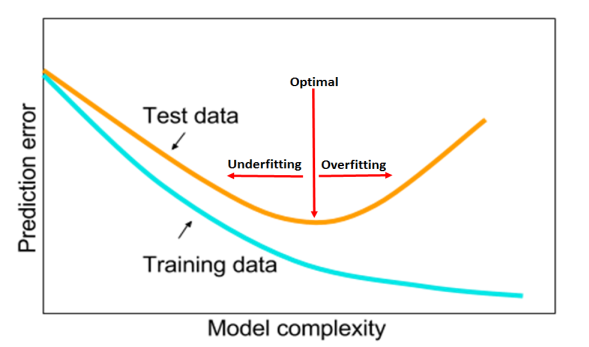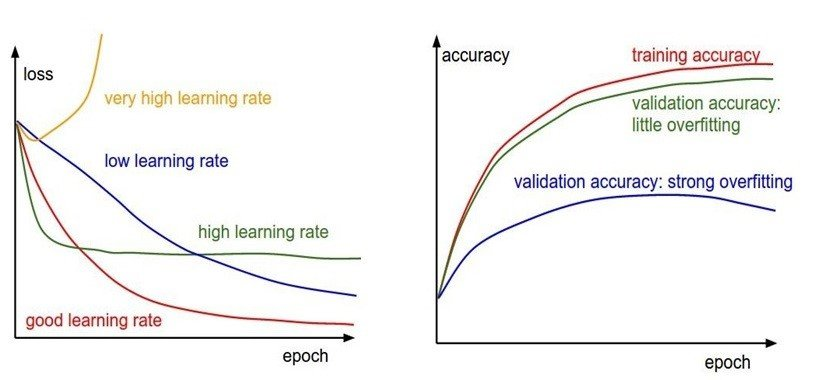

### **Validate the model and comment the results: Model Base**

In [ ]:
def plot_loss(history, model_name = ""):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss - " + model_name)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history, model_name = ""):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy - " + model_name)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

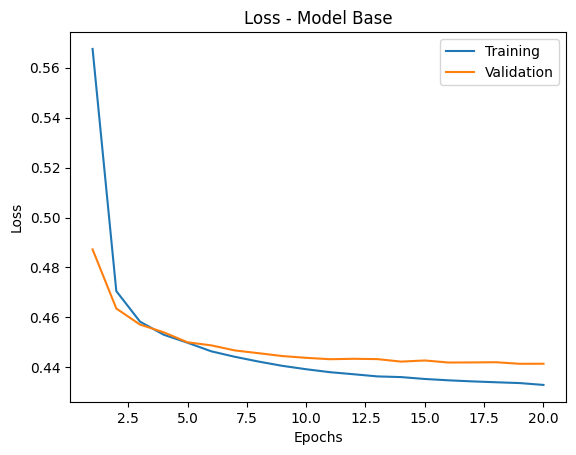

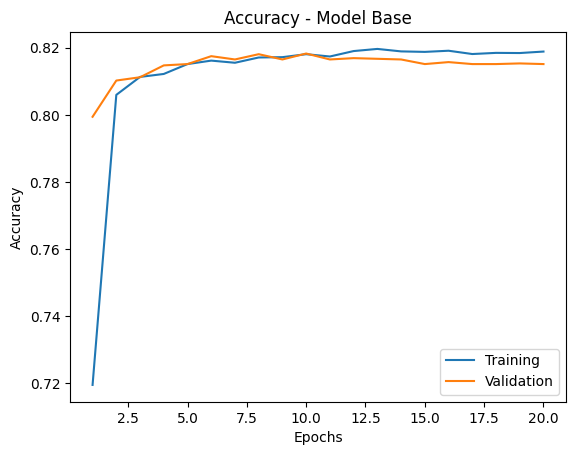

In [ ]:
# Model base
plot_loss(history_base, "Model Base")
plot_accuracy(history_base, "Model Base")

> The "Model Base" converges very quickly. The accuracy plot is rather smooth and there is some overfitting, since the training accuracy is a bit higher than validation. The training and validation loss are pretty close. Stopping at 10 epochs is a better trade-off in this case, removing the overfitting.

In [ ]:
y_pred_model_base = model_base.predict(X_train)
y_pred_model_base = (y_pred_model_base > 0.5).astype(int)

print(classification_report(y_train, y_pred_model_base, target_names=["Class 0", "Class 1"]))

797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.95      0.89     19795
     Class 1       0.66      0.37      0.48      5680

    accuracy                           0.82     25475
   macro avg       0.75      0.66      0.68     25475
weighted avg       0.80      0.82      0.80     25475



> We can see how the model struggles with the unbalanced class, as the recall and f1-score values are much lower compared to those of the class 0.

### **Validate the model and comment the results: Model Base Variant**

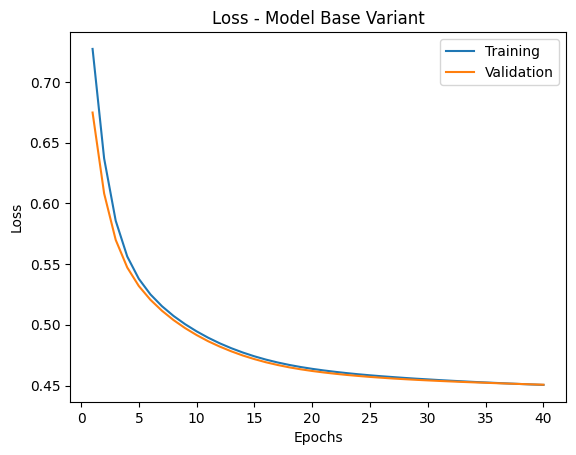

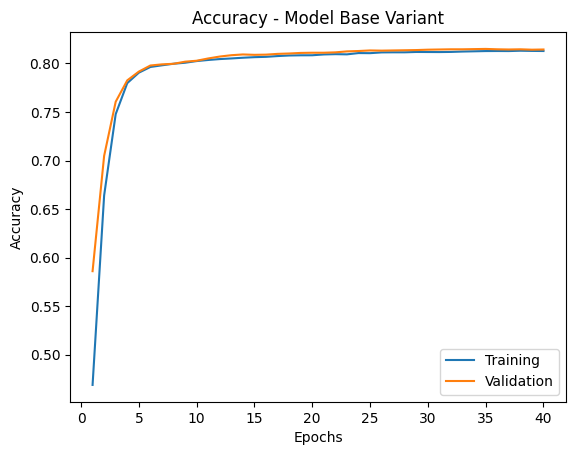

In [ ]:
# Model base variant
plot_loss(history_base_var,  "Model Base Variant")
plot_accuracy(history_base_var,  "Model Base Variant")

> The "Model Base Variant" converges slower than the normal one, because of the smaller learning rate, but it's smoother with similar performance with no real overfitting.

In [ ]:
y_pred_model_base_var = model_base_var.predict(X_train)
y_pred_model_base_var = (y_pred_model_base_var > 0.5).astype(int)

print(classification_report(y_train, y_pred_model_base_var, target_names=["Class 0", "Class 1"]))

797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

     Class 0       0.83      0.96      0.89     19795
     Class 1       0.68      0.31      0.42      5680

    accuracy                           0.81     25475
   macro avg       0.76      0.63      0.66     25475
weighted avg       0.80      0.81      0.78     25475



> The metrics are still good, but compared to the first model a bit lower. For one hidden layer the default learning rate seems better in both convergence speed and overall performance.

### **Validate the model and comment the results: Model Alternative**

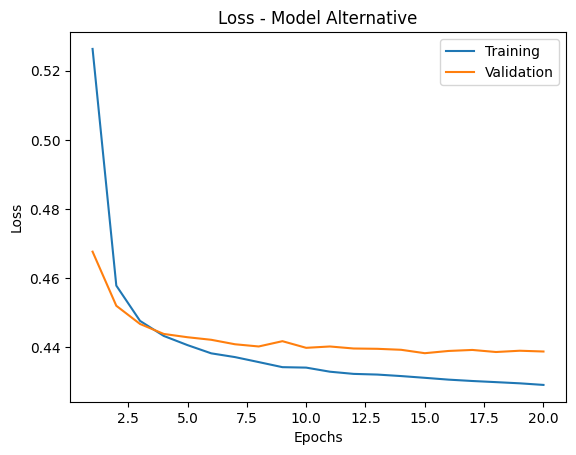

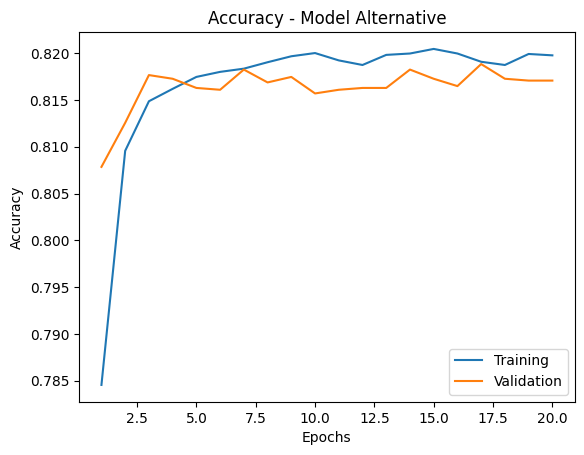

In [ ]:
# Model alternative
plot_loss(history_alt,  "Model Alternative")
plot_accuracy(history_alt, "Model Alternative")

> Adding a second layer with the default learning rate seems to keep similar performance. The overfitting is a bit more noticaeble here, especially in the loss graph since the NN is more complex, but overall good performance like the "Model Base".

In [ ]:
y_pred_model_alt = model_alt.predict(X_train)
y_pred_model_alt = (y_pred_model_alt > 0.5).astype(int)

print(classification_report(y_train, y_pred_model_alt, target_names=["Class 0", "Class 1"]))

797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.95      0.89     19795
     Class 1       0.68      0.37      0.47      5680

    accuracy                           0.82     25475
   macro avg       0.76      0.66      0.68     25475
weighted avg       0.80      0.82      0.80     25475



> This model has indeed very similar metrics to the "Model Base".

### **Validate the model and comment the results: Model Alternative Variant**

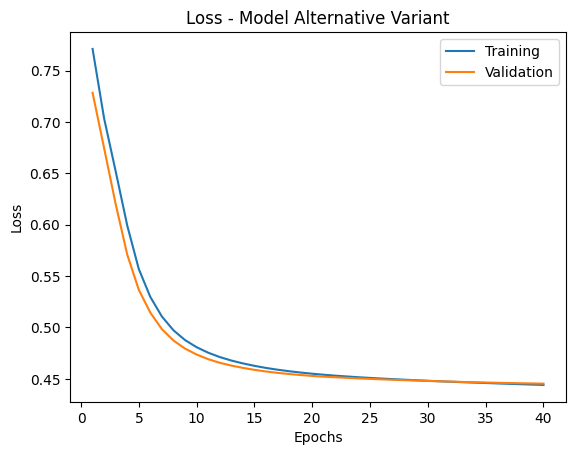

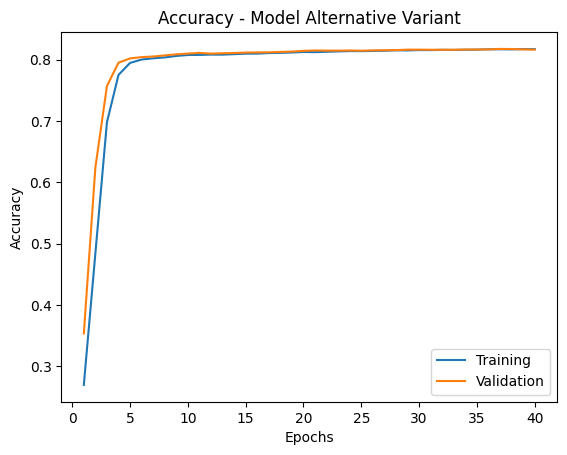

In [ ]:
# Model alternative variant
plot_loss(history_alt_var, "Model Alternative Variant")
plot_accuracy(history_alt_var, "Model Alternative Variant")

> With an smaller learning rate the "Model Alternative Variant" is much smoother compared to the other plots, but also converging slower (very quick at the start, but still descending up to the 40 epoch for the loss). This time we see an actually improvement since training and validation are very close to each other and the performance is very similar to the "Model Base" and definitely better than "Model Base Variant".

In [ ]:
y_pred_model_alt_var = model_alt_var.predict(X_train)
y_pred_model_alt_var = (y_pred_model_alt_var > 0.5).astype(int)

print(classification_report(y_train, y_pred_model_alt_var, target_names=["Class 0", "Class 1"]))

797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.95      0.89     19795
     Class 1       0.66      0.37      0.47      5680

    accuracy                           0.82     25475
   macro avg       0.75      0.66      0.68     25475
weighted avg       0.80      0.82      0.80     25475



> Similar performance in metrics to the "Model Base" but more epochs to converge.

### **Validate the model and comment the results: Considerations**

> Every model has passed the baseline value of 78%, reaching about 81% in both training and validation. Considering that there are very few neurons (just 16 and 8 in the hidden layers for the most complex NN) and also that some features have been dropped and merged, it can be considered a very good start. A smaller learning rate seems to smooth the plots (and the weights) but converges slower, while the default one converges more quickly but tends to overfit quickly aswell. The first model (Model Base) seems the best one overall, especially if trained a second time on 10 epochs, while the last one (Alternative Variant) is very solid aswell and very smooth. The second hidden layer doesn't really make a difference with the default learning rate but improves the performances with the smaller one.

> There have been also experiments with lower learning rates (such as 0.00001) which lead to bad performance because of a very slow convergence, and different values of "batch_size", the activation function "tanh" in the hidden layers and validation_split, which did not made significant improvements to the performance overall. Adding more that two layers also would make no real improvements, but just make the network more complex.

## **Make predictions (on the provided test set)**

> The 4 models analyzed seem to be already good in validation (even if not much more than a model that answers with only 0, with around 77% of accuracy), so the expectations in a blind test are that we can get somewhere near 80% of accuracy.
Since the target is unbalanced we can expect a lower value of f1-score and recall and some bias in favour of the class *0* and this is could be the case looking at the following predictions.

In [ ]:
predictions_base = model_base.predict(X_test)
predictions_base_var = model_base_var.predict(X_test)
predictions_alt = model_alt.predict(X_test)
predictions_alt_var = model_alt_var.predict(X_test)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
def predictions(pred, fileName):
  # Round predictions to 0 or 1
  rounded_predictions = np.round(pred).astype(int)
  # Convert rounded predictions to a single-column DataFrame
  predictions_df = pd.DataFrame(rounded_predictions, columns=["Prediction"])
  # Save the predictions
  predictions_df.to_csv(fileName + ".csv", index=False, header=False)
  print(predictions_df["Prediction"].value_counts())

In [ ]:
predictions(predictions_base, "predictions_base")

Prediction
0    3969
1     531
Name: count, dtype: int64


In [ ]:
predictions(predictions_base_var, "predictions_base_var")

Prediction
0    4086
1     414
Name: count, dtype: int64


> With more layers there is an increase of 1 in the values count, meaning that the model might be able to discriminate better the unbalanced class, but not significantly.

In [ ]:
predictions(predictions_alt, "predictions_alt")

Prediction
0    3988
1     512
Name: count, dtype: int64


In [ ]:
predictions(predictions_alt_var, "predictions_alt_var")

Prediction
0    3970
1     530
Name: count, dtype: int64


# **OPTIONAL -- Export the predictions in the format indicated in the assignment release page and verify you prediction on the [assessment page](https://aml-assignmentone-2425.streamlit.app/).**

> The "Model Base" has been submitted to the leaderboard and getting the following results:



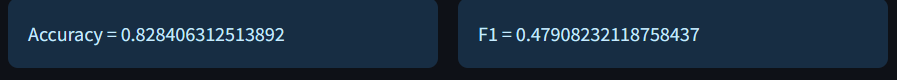

> We can see a very good value in accuracy and, as expected a lower value in F1 Score.